# 🛠️ Internship Project: Insurance Claim Amount Prediction

**Intern:** Ashna Imtiaz
  
**Task_04:**  Insurance Claim Amount prediction

**Objective:** Predict insurance claim amounts using regression models as part  of a data science internship.

**Organization:** Developers Hub Corporation



# Importing Essential Libraries

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Saving
import joblib

# Optional: To ignore warnings in output
import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install -q kaggle

In [4]:
# move the kaggle.json to the Right Directory and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
# Download the dataset
!kaggle datasets download -d mirichoi0218/insurance


Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 53.6MB/s]


In [7]:
# Unzip the dataset
!unzip -q insurance.zip

# Load the Dataset

In [9]:
df = pd.read_csv("insurance.csv")
df.head()  # show the first 5 rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Basic data exploration methods

In [11]:
# Shape of the dataset
print(df.shape)

(1338, 7)


In [12]:
# Column names
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [13]:
# Data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [14]:
# Summary statistics for numerical columns
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


## 📊 Insights from Descriptive Statistics

### Age
- The **average age** of policyholders is approximately **39 years**, with a minimum of 18 and maximum of 64.
- The **age distribution** is fairly wide, suggesting a diverse group of policyholders from young adults to senior citizens.

### BMI (Body Mass Index)
- The **mean BMI** is about **30.66**, which falls in the **overweight** category (BMI > 25).
- The BMI ranges from **15.96** to **53.13**, indicating the presence of both underweight and obese individuals.

### Children
- On average, each policyholder has around **1 child**.
- The **majority of people have between 0 to 2 children**, but some have up to **5**.

### Charges (Insurance Claim Amount)
- The **average claim amount** is around **13,270**.
- There is a **large standard deviation (~12,110)**, indicating high variation in claim amounts.
- The **minimum charge is ~1,121** and the **maximum is ~63,770**, showing that some individuals incurred very high medical costs.
- The 75th percentile is **16,639**, meaning that **25% of individuals have very high claim amounts** compared to the rest.

### General Observations
- The claim amount (`charges`) seems to be **right-skewed**, likely due to a few individuals with extremely high costs.
- BMI and age may have strong influence on charges and should be explored further during modeling.


In [15]:
# Count of missing values per column
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [16]:
# Unique values per column
print(df.nunique())

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [17]:
# Count of duplicate rows
print(df.duplicated().sum())

1


# **Visual Exploratory Data Analysis (EDA)**

# 1️⃣ Distribution Plots

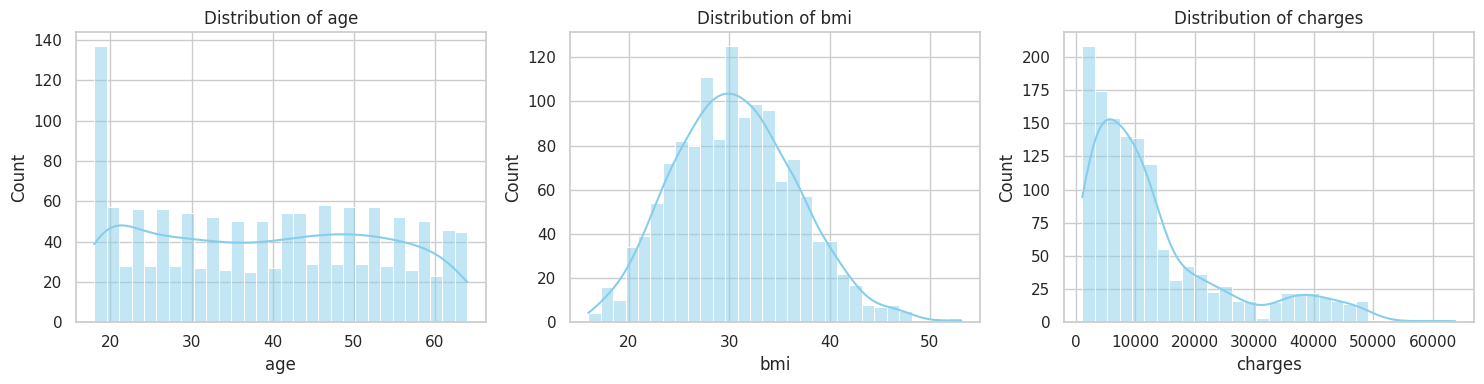

In [21]:
# Set Seaborn style
sns.set(style="whitegrid")


plt.figure(figsize=(15, 4))
for i, col in enumerate(['age', 'bmi', 'charges']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# 2️⃣ Boxplots by category

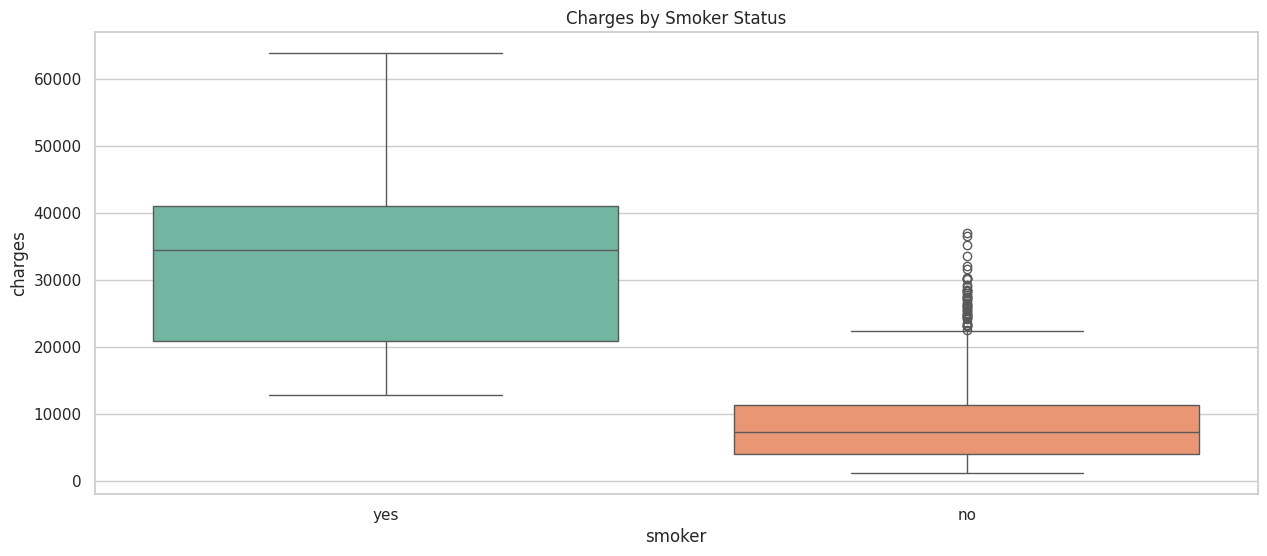

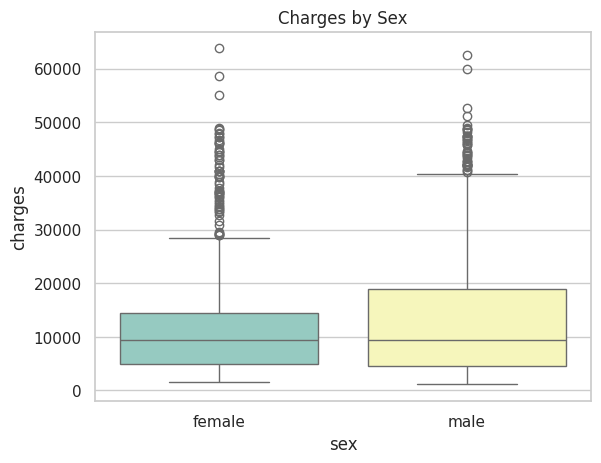

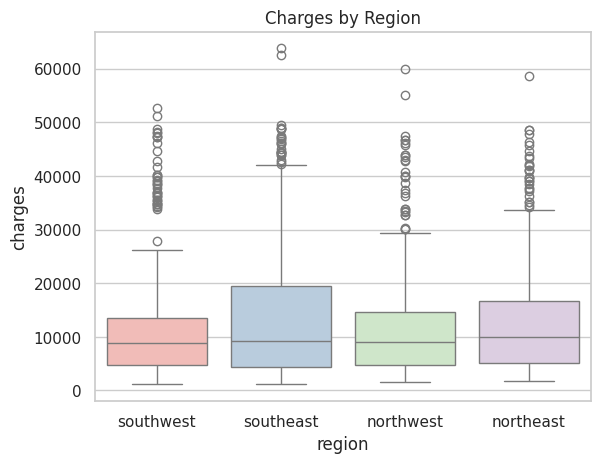

In [22]:

plt.figure(figsize=(15, 6))
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title("Charges by Smoker Status")
plt.show()

sns.boxplot(x='sex', y='charges', data=df, palette='Set3')
plt.title("Charges by Sex")
plt.show()

sns.boxplot(x='region', y='charges', data=df, palette='Pastel1')
plt.title("Charges by Region")
plt.show()



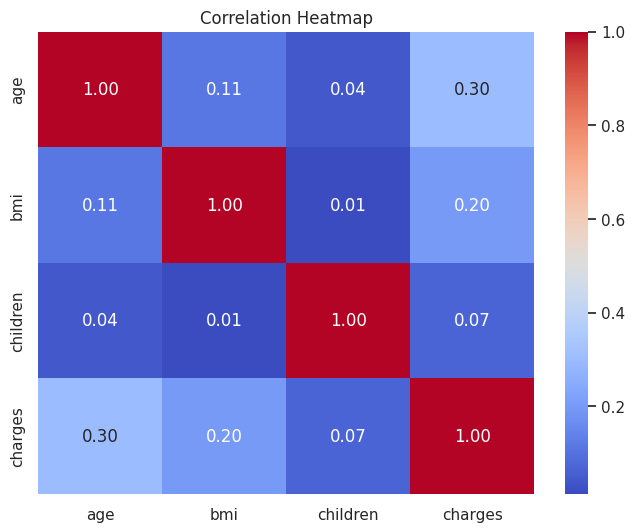

In [23]:
# 3️⃣ Correlation Heatmap
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




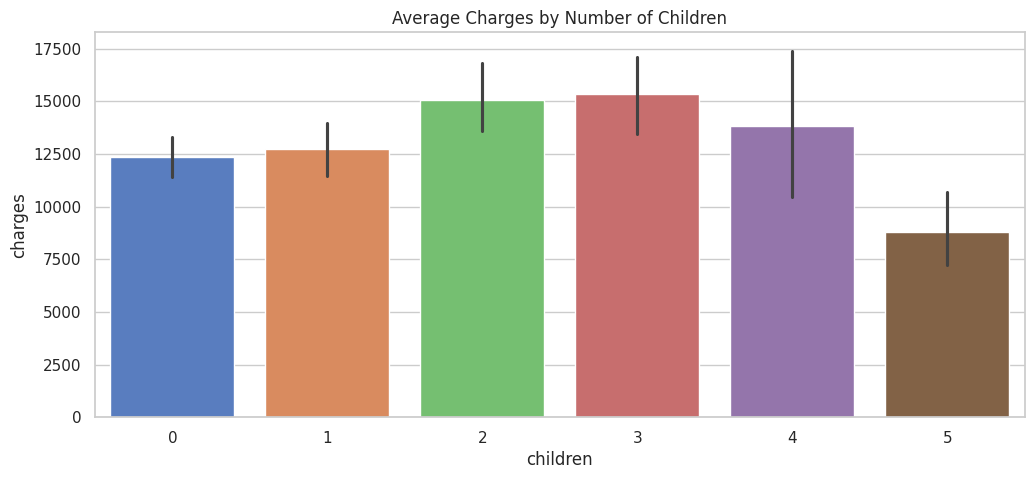

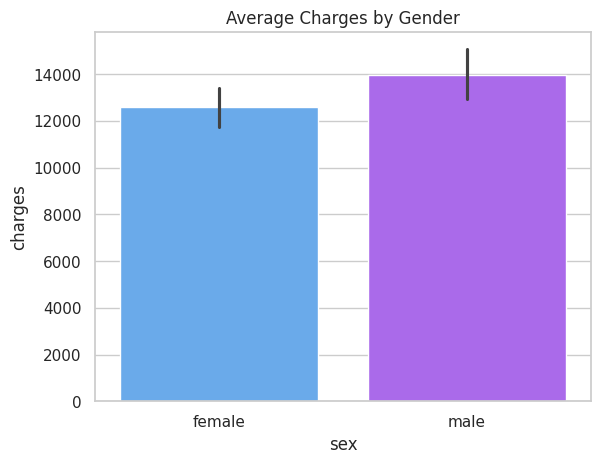

In [25]:

# 4️⃣ Barplots for Categorical Features vs Charges
plt.figure(figsize=(12, 5))
sns.barplot(x='children', y='charges', data=df, palette='muted')
plt.title("Average Charges by Number of Children")
plt.show()

sns.barplot(x='sex', y='charges', data=df, palette='cool')
plt.title("Average Charges by Gender")
plt.show()

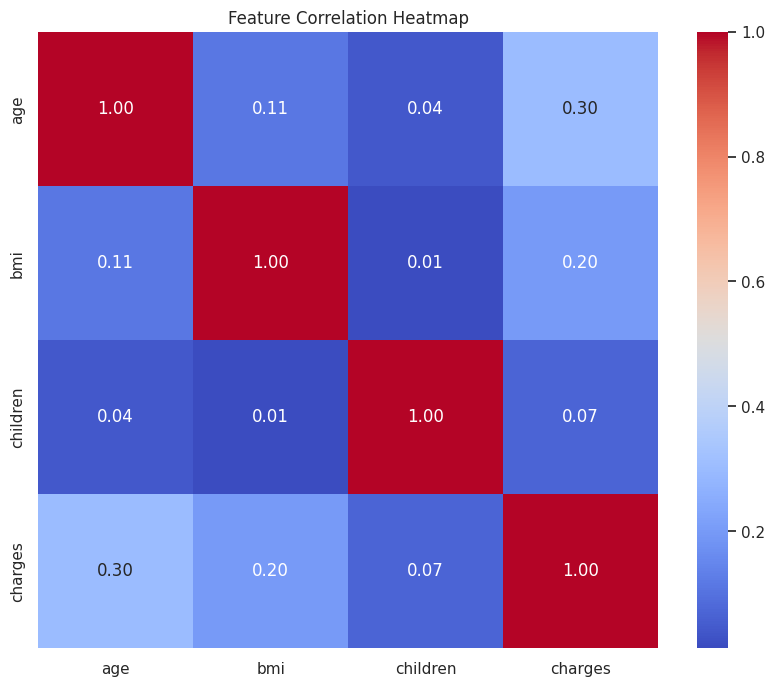

In [55]:
# Assuming your data is in a DataFrame called df
correlation_matrix = df.select_dtypes(include="number").corr()

# Display the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## 📊 Visual EDA Summary

1. **Age & BMI** follow a roughly normal distribution, while **charges are right-skewed** due to a few individuals with very high medical expenses.

2. **Smokers** have **significantly higher insurance charges** than non-smokers, making it the most influential factor.

3. **Age and BMI** show a visible upward trend with charges, indicating a **positive relationship**.

4. **Gender, region, and number of children** do **not show strong influence** on insurance charges.

5. **Outliers** are evident in **charges** and **BMI**, especially for **smokers**, which may impact model performance.

6. The **correlation heatmap** confirms **relationships** between `charges` and variables like **children**, **age**, and **BMI**.


# Data Preprocessing

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Handle Categorical Variables**

    We have three categorical columns:
    sex (male, female)
    smoker (yes, no)
    region (northeast, northwest, southeast, southwest)

In [27]:
# One-hot encode categorical variables with integer output (0/1)
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)


# **Train-Test Split**

In [31]:
# Separate features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Scale Numerical Features**

In [32]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## *Model Training: Linear Regression*

In [34]:
# Initialize and fit the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(ridge, params, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'alpha': 1}


### Make Predictions

In [35]:
y_pred = lr_model.predict(X_test_scaled)

### **Evaluate the Model**

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")


MAE:  4181.19
MSE:  33596915.85
RMSE: 5796.28
R²:   0.7836


MAE (4181.19) means the model's predictions are off by about $4,181 on average.

RMSE (5796.28) indicates the typical error size; higher due to squaring errors.

MSE (a squared error metric) is large due to some high prediction errors.

R² (0.7836) shows that 78.36% of the variation in charges is explained by the model — a strong but not perfect fit.

# Visualize Predictions vs Actual

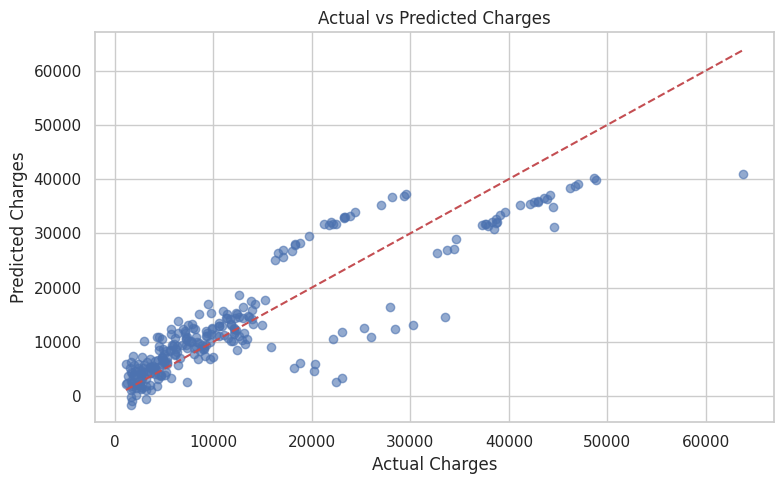

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
# 1. Try Polynomial Features (if you suspect non-linear relationships)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Evaluate performance again
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("RMSE:", mean_squared_error(y_test, y_pred_poly))
print("R²:", r2_score(y_test, y_pred_poly))


MAE: 2729.50013363945
MSE: 20712805.9879185
RMSE: 20712805.9879185
R²: 0.8665830903164832


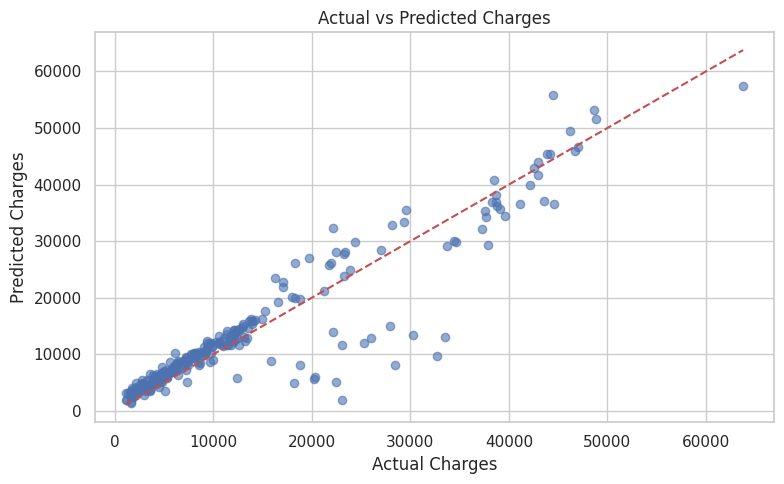

In [49]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_poly, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
# 2. Try Regularized Models (Ridge, Lasso, ElasticNet)
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge example
ridge = Ridge()
params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, params, cv=5)
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

print("Best Ridge Alpha:", ridge_cv.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", mean_squared_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))


Best Ridge Alpha: {'alpha': 1}
MAE: 4193.585298299822
RMSE: 33645037.09177902
R²: 0.7832830144988215


In [44]:
# 3. Log-transform the target if it is right-skewed
import numpy as np

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

lr = LinearRegression()
lr.fit(X_train, y_train_log)
y_pred_log = lr.predict(X_test)

# Convert back predictions to original scale
y_pred_actual = np.expm1(y_pred_log)

print("MAE:", mean_absolute_error(y_test, y_pred_actual))
print("RMSE:", mean_squared_error(y_test, y_pred_actual))
print("R²:", r2_score(y_test, y_pred_actual))


MAE: 3888.4431587999825
RMSE: 61059596.602415055
R²: 0.6066982575915568


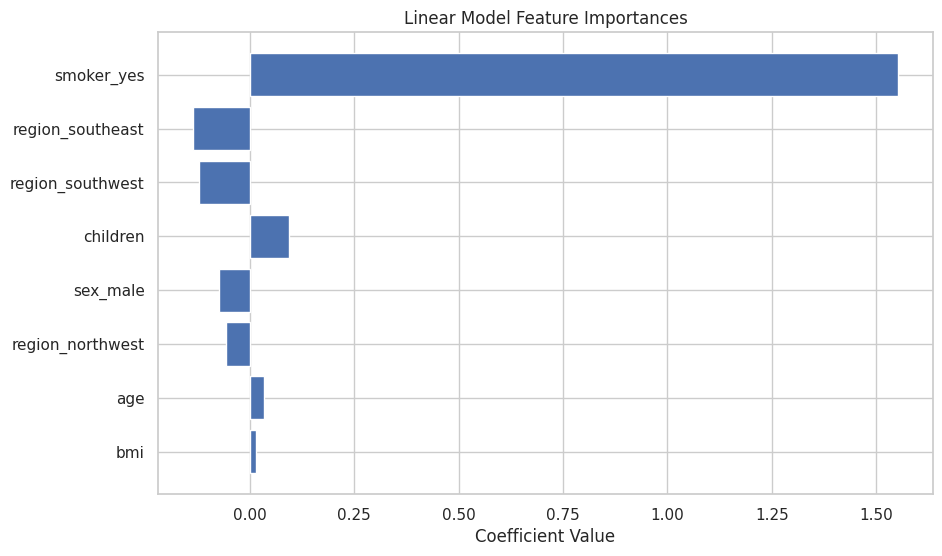

In [45]:
# 4. Optional: Feature Importance & Selection
import matplotlib.pyplot as plt
import pandas as pd

coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr.coef_})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title('Linear Model Feature Importances')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()
plt.show()


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Common alpha range
alphas = [0.01, 0.1, 1, 10, 100]

# 1. Ridge
ridge_cv = GridSearchCV(Ridge(), {'alpha': alphas}, cv=5)
ridge_cv.fit(X_train, y_train)
ridge_best = ridge_cv.best_estimator_

# 2. Lasso
lasso_cv = GridSearchCV(Lasso(), {'alpha': alphas}, cv=5)
lasso_cv.fit(X_train, y_train)
lasso_best = lasso_cv.best_estimator_

# 3. ElasticNet (also tune l1_ratio)
elastic_cv = GridSearchCV(ElasticNet(), {'alpha': alphas, 'l1_ratio': [0.2, 0.5, 0.8]}, cv=5)
elastic_cv.fit(X_train, y_train)
elastic_best = elastic_cv.best_estimator_

# Print best params
print("Best Ridge:", ridge_cv.best_params_)
print("Best Lasso:", lasso_cv.best_params_)
print("Best ElasticNet:", elastic_cv.best_params_)


Best Ridge: {'alpha': 1}
Best Lasso: {'alpha': 100}
Best ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.8}


In [50]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Define polynomial transformer
poly = PolynomialFeatures(degree=2, include_bias=False)  # Try degree=2, adjust if needed

# Step 2: Define Ridge and Lasso with cross-validation
ridge = RidgeCV(alphas=np.logspace(-3, 3, 10), cv=5)
lasso = LassoCV(alphas=np.logspace(-3, 3, 10), cv=5, max_iter=5000)

# Step 3: Create pipelines
ridge_pipeline = make_pipeline(poly, StandardScaler(), ridge)
lasso_pipeline = make_pipeline(poly, StandardScaler(), lasso)

# Step 4: Fit models
ridge_pipeline.fit(X_train, y_train)
lasso_pipeline.fit(X_train, y_train)

# Step 5: Evaluate
for name, model in [("Polynomial + Ridge", ridge_pipeline), ("Polynomial + Lasso", lasso_pipeline)]:
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name} Performance:")
    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R²:  ", r2_score(y_test, y_pred))



🔹 Polynomial + Ridge Performance:
MAE:  2732.3751188779706
RMSE: 4550.6249912673175
R²:   0.8666128372698234

🔹 Polynomial + Lasso Performance:
MAE:  2727.4827866815294
RMSE: 4536.440266070195
R²:   0.8674431018541784


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import make_scorer, mean_squared_error

# Define polynomial degree
poly_degree = 2

# Define models and parameters
models_params = {
    'Ridge': {
        'model': Ridge(),
        'params': {
            'model__alpha': [0.1, 1, 10, 100]
        }
    },
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'params': {
            'model__alpha': [0.001, 0.01, 0.1, 1, 10]
        }
    },
    'ElasticNet': {
        'model': ElasticNet(max_iter=10000),
        'params': {
            'model__alpha': [0.001, 0.01, 0.1, 1],
            'model__l1_ratio': [0.1, 0.5, 0.9]
        }
    }
}

best_models = {}

# Use negative RMSE for scoring (lower is better)
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

for name, config in models_params.items():
    pipe = Pipeline([
        ('poly', PolynomialFeatures(degree=poly_degree, include_bias=False)),
        ('scaler', StandardScaler()),
        ('model', config['model'])
    ])

    grid = GridSearchCV(pipe, config['params'], scoring=rmse_scorer, cv=5, error_score='raise')

    grid.fit(X_train, y_train)
    best_models[name] = grid

    print(f"🔹 {name} Best RMSE: {-grid.best_score_:.2f}")
    print(f"   Best Params: {grid.best_params_}\n")

# Optional: choose the best overall model based on RMSE
best_model_name = min(best_models, key=lambda name: -best_models[name].best_score_)
print(f"✅ Best overall model: {best_model_name}")


🔹 Ridge Best RMSE: 24445825.61
   Best Params: {'model__alpha': 0.1}

🔹 Lasso Best RMSE: 24281425.74
   Best Params: {'model__alpha': 10}

🔹 ElasticNet Best RMSE: 24444606.86
   Best Params: {'model__alpha': 0.001, 'model__l1_ratio': 0.5}

✅ Best overall model: Lasso


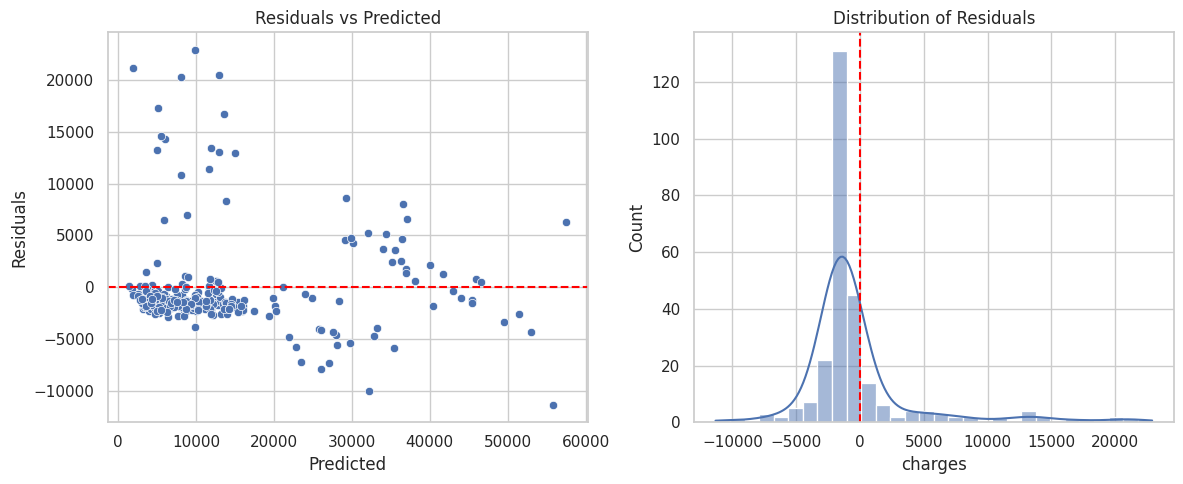

In [65]:
# Select the best model (e.g., Lasso in your output)
final_model = best_models[best_model_name].best_estimator_

# Fit on full training set
final_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_best = final_model.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred_best

# Plot residuals
plt.figure(figsize=(12, 5))

# Residuals vs Predictions
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_best, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")

# Distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Residuals")

plt.tight_layout()
plt.show()


 How to Interpret:
Residuals vs Predicted:

If residuals are randomly scattered around zero → good.

If there's a pattern (e.g., curve or funnel shape) → model might be missing something (nonlinearity, heteroscedasticity).

Distribution of Residuals:

Should be roughly normally distributed, centered around zero.

Skewed or wide tails → possible outliers or model bias.

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)
params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
grid = GridSearchCV(rf, params, cv=5, scoring='neg_root_mean_squared_error')
grid.fit(X_train_scaled, y_train)

print("Best RMSE:", -grid.best_score_)
print("Best Params:", grid.best_params_)


Best RMSE: 4914.93086863419
Best Params: {'max_depth': 10, 'n_estimators': 200}


In [72]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict using best model
y_pred_rf = grid.predict(X_test_scaled)

# Calculate and print MAE and R²
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


MAE: 2521.9832028839423
R²: 0.8667442362497738


Interpretation

> Random Forest Regressor:

Lowest MAE, meaning better average prediction accuracy.

Highest RMSE, meaning it's making some larger individual errors.

R² is almost the same as Lasso, but slightly lower.

> Polynomial + Lasso:

Best R² and RMSE, indicating more consistent predictions.

MAE is slightly higher than RF, meaning a bit less accurate on average, but more stable.

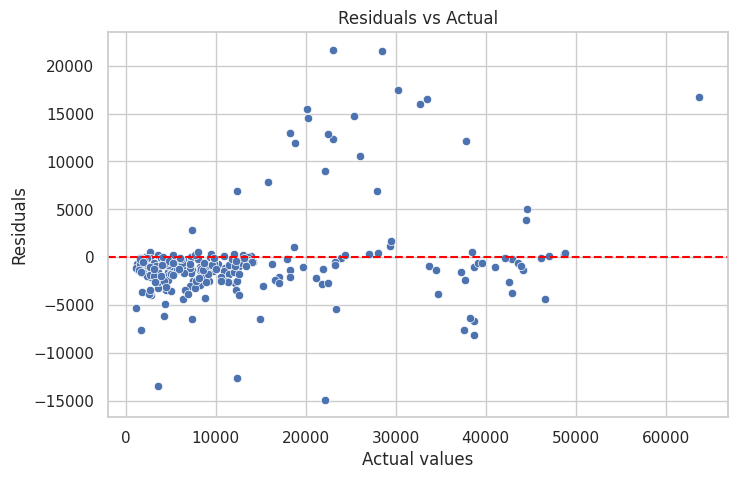

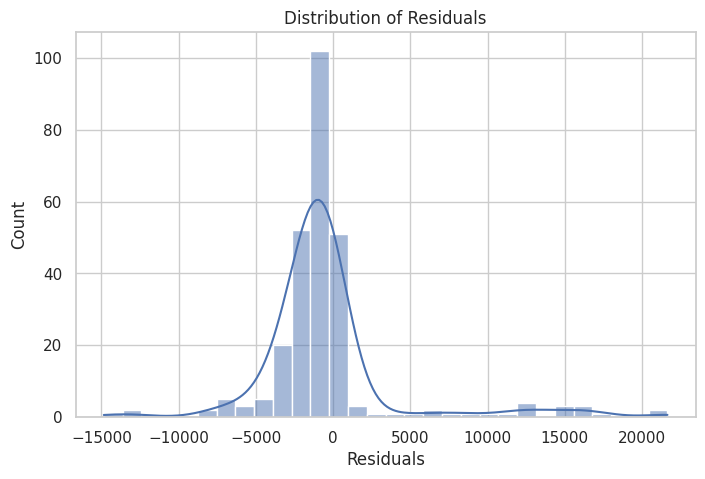

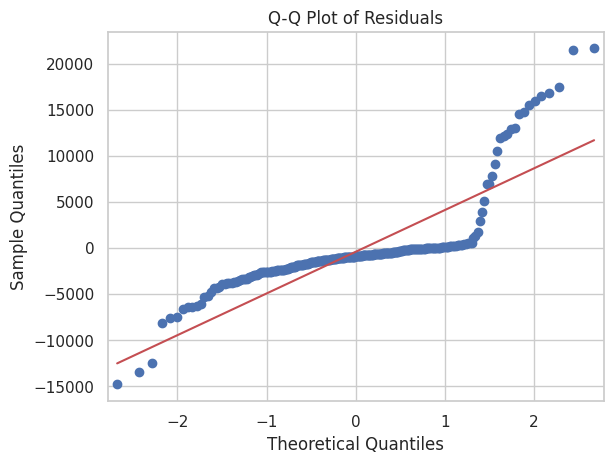

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predictions from the best model
best_rf_model = grid.best_estimator_  # If you stored grid as the RandomForest CV object
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# 1. Residual Plot (actual vs residual)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual')
plt.show()

# 2. Distribution of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

# 3. Q-Q Plot (for normality check)
import scipy.stats as stats
import statsmodels.api as sm

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


# **plotting residuals, histograms, and Q-Q plots**

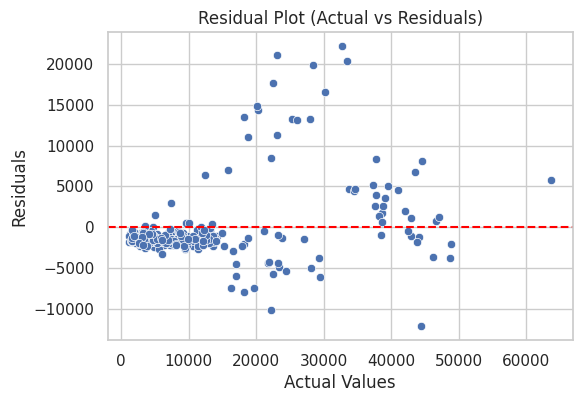

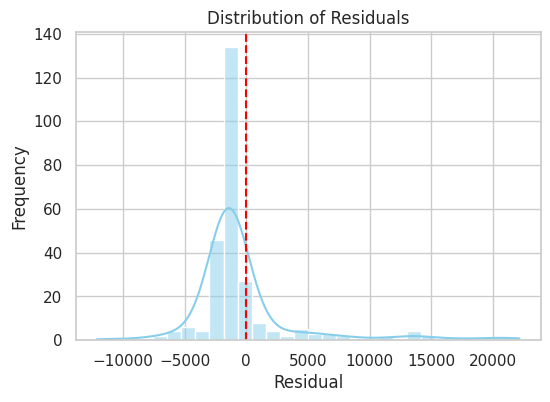

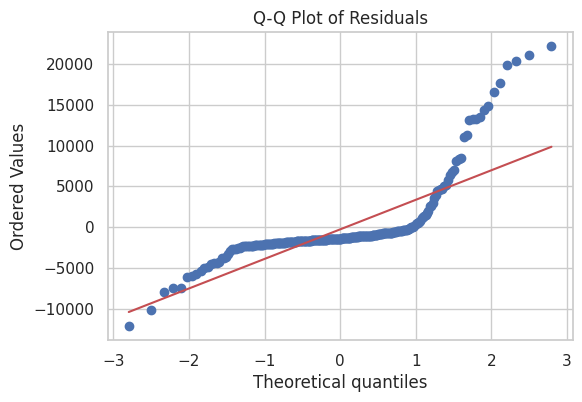

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Use predictions from Lasso + Poly
y_pred = lasso_pipeline.predict(X_test)
residuals = y_test - y_pred

# 1. Residual Plot (Actual vs Residuals)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Actual vs Residuals)")
plt.show()

# 2. Distribution of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# 3. Q-Q Plot (Normality Check)
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


## **Polynomial + Lasso is better — lower RMSE, best R².**

**Polynomial features** are created by transforming the original input features into higher-degree combinations (e.g., squared, cubed terms or feature interactions). This allows a linear model to capture **non-linear relationships** in the data without changing the underlying algorithm. For example, a feature `x` becomes `[x, x², x³, ...]`, and multiple features can combine like `x1*x2`. While this increases model flexibility, it can also lead to **overfitting** if not regularized or if the degree is too high. That's why **regularization techniques** like Ridge or Lasso are often used alongside polynomial features to control complexity and maintain generalization.


show high R² values (~0.867), indicating that about 86.7% of the variance in the target variable is explained by the model (polynomial + Lasso) .

This suggests a very good fit to the data.

## **Finalizing the Polynomial + Lasso model for saving.**

> save the model with best alpha:

Best alpha is the optimal regularization strength in Lasso, found using cross-validation. It controls model complexity by shrinking coefficients to prevent overfitting while improving generalization.

In [73]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LassoCV, Lasso

# 1. Cross-validation to find best alpha with scaling
lasso_cv = LassoCV(cv=5, random_state=42)
pipeline_cv = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), lasso_cv)
pipeline_cv.fit(X_train, y_train)

# 2. Use best alpha for final model
best_alpha = lasso_cv.alpha_
final_model = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), Lasso(alpha=best_alpha))
final_model.fit(X_train, y_train)

# 3. Predict
y_pred = final_model.predict(X_test)


## **Get Evaluation Metrics**

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R² Score: 0.8662
RMSE: 4558.1779
MAE: 2816.7138


# Saving the full pipeline model

In [77]:
import joblib

# Save the pipeline to a file
joblib.dump(lasso_pipeline, 'final_lasso_model.pkl')

print("Model saved as 'final_lasso_model.pkl'")


Model saved as 'final_lasso_model.pkl'


In [78]:
# Load the saved model
loaded_model = joblib.load('final_lasso_model.pkl')


# **Best Overall Model:**

Polynomial + Lasso (auto alpha via CV) performed the best overall:

    Highest R² (0.8662) → captures more variance
    Lowest RMSE/MAE → more accurate predictions